In [1]:
import pandas as pd

In [4]:
# Read in the data
reviews = pd.read_feather("FilteredData/review_philly.feather")

In [6]:
reviews['text']

0         I am a long term frequent customer of this est...
1         Good food--loved the gnocchi with marinara\nth...
2         Wow!  Yummy, different,  delicious.   Our favo...
3         I thoroughly enjoyed the show.  Chill way to s...
4         My boyfriend and I tried this deli for the fir...
                                ...                        
855075           Racist!!! Wont serve you if you are ethnic
855076                                     Stuff face time.
855077                                             Blizzard
855078        Stopped by and it was closed on wed. 10/3/12!
855079          Using a restaurant.com coupon...go get one!
Name: text, Length: 855080, dtype: object

In [7]:
# Use LDA to find topics in the reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a vectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Following this tutorial: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

c:\Users\Cody\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
c:\Users\Cody\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [9]:
# Change text to lowercase
reviews_lower = reviews['text'].str.lower()
# Remove punctuation
reviews_lower = reviews_lower.str.replace('[^\w\s]','')

<ipython-input-9-198d7c50ce37>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_lower = reviews_lower.str.replace('[^\w\s]','')


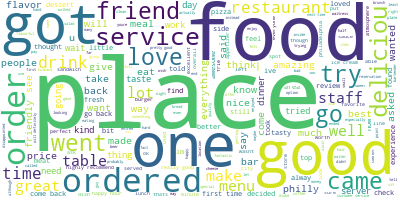

In [11]:
# Create wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Join the reviews into one long string
long_string = ','.join(list(reviews_lower.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [14]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cody\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [20]:
# Create a list of stop words
stop_words = stopwords.words('english')
stop_words.extend(['philly','got'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
review_text = reviews_lower.values.tolist()
review_words =  list(sent_to_words(review_text))
# Remove stop words
review_words = remove_stopwords(review_words)


In [21]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(review_words)
# Create Corpus
texts = review_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [23]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.018*"place" + 0.017*"great" + 0.015*"good" + 0.014*"bar" + 0.012*"food" + '
  '0.012*"beer" + 0.007*"like" + 0.007*"really" + 0.007*"nice" + '
  '0.006*"drinks"'),
 (1,
  '0.013*"like" + 0.012*"dont" + 0.011*"get" + 0.011*"place" + 0.010*"food" + '
  '0.008*"im" + 0.007*"one" + 0.007*"go" + 0.006*"ive" + 0.006*"know"'),
 (2,
  '0.012*"good" + 0.009*"food" + 0.009*"sauce" + 0.009*"chicken" + '
  '0.007*"like" + 0.007*"ordered" + 0.006*"dish" + 0.006*"rice" + 0.006*"also" '
  '+ 0.006*"fried"'),
 (3,
  '0.021*"food" + 0.020*"great" + 0.013*"place" + 0.013*"delicious" + '
  '0.011*"service" + 0.011*"amazing" + 0.010*"good" + 0.010*"back" + '
  '0.009*"definitely" + 0.008*"brunch"'),
 (4,
  '0.009*"hair" + 0.009*"great" + 0.008*"time" + 0.007*"get" + 0.006*"back" + '
  '0.006*"place" + 0.005*"like" + 0.005*"would" + 0.005*"one" + 0.005*"go"'),
 (5,
  '0.014*"coffee" + 0.012*"cream" + 0.011*"ice" + 0.009*"chocolate" + '
  '0.007*"good" + 0.007*"tea" + 0.007*"place" + 0.007*"like" 